## TextBlob Sentiment Analysis
The input used for this analysis will be the corpus

In [1]:
import pandas as pd

corpus_df = pd.read_pickle('corpus.pkl')
corpus_df

,transcript,full_names
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bert,[electronic music playing] [male announcer] La...,Bill Burr
bill,"[cheers and applause] All right, thank you! Th...",Bo Burnham
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,[organ music playing] Welcome to Radio City Mu...,John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


## Sentiment Labels: 
Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.

Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [3]:
from textblob import TextBlob

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

corpus_df['polarity'] = corpus_df['transcript'].apply(polarity)
corpus_df['subjectivity'] = corpus_df['transcript'].apply(subjectivity)
corpus_df

,transcript,full_names,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bert,[electronic music playing] [male announcer] La...,Bill Burr,-0.000885,0.497054
bill,"[cheers and applause] All right, thank you! Th...",Bo Burnham,0.016479,0.537016
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Dave Chappelle,-0.007704,0.521939
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,[organ music playing] Welcome to Radio City Mu...,John Mulaney,0.082258,0.477899
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


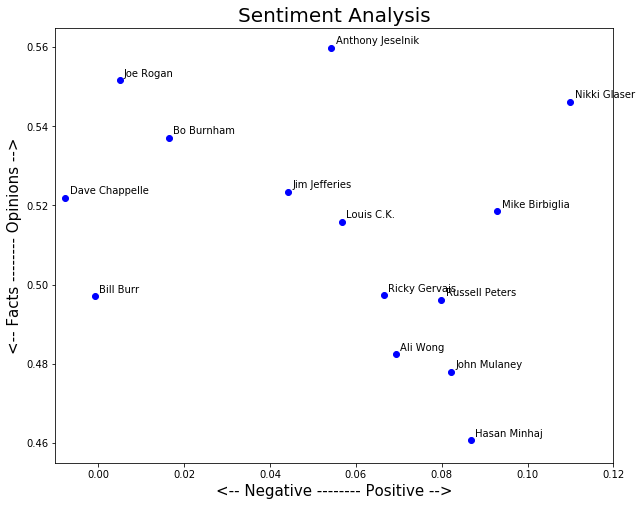

<Figure size 720x576 with 0 Axes>

In [7]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(corpus_df.index):
    x = corpus_df.polarity.loc[comedian]
    y = corpus_df.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, corpus_df['full_names'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()
plt.savefig('sentiment_analysis.png')